This script process statistics related to the experiments ran from the benchmark created 

TODO: Agregar urls, referencias, etc...


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon as wilcoxon
from scipy.stats import stats 

Atributes that are going to be considered for tracking during iterations

In [2]:
# Data that we'll keep track of

CLASES = [
    "org.openscience.cdk.index.CASNumber",
    "se.kth.cid.identity.ResourceURL",
    "se.kth.cid.identity.URI",
    "se.kth.cid.identity.URIClassifier",
    "se.kth.cid.identity.URIUtil",
    "se.kth.cid.identity.PathURN",
    "se.kth.cid.identity.URN",
    "se.kth.cid.identity.MIMEType",
    "stempeluhr.validation.TimeChecker",
    "org.jxpfw.util.InternationalBankAccountNumber",
    "org.jxpfw.util.CLocale",
    "com.prowidesoftware.swift.model.IBAN",
    "com.prowidesoftware.swift.model.BIC",
    "com.sun.jndi.toolkit.url.ConcreteURLContext",
    "java.util.regex.Pattern",
    "java.util.ArrayList",
    "org.apache.commons.cli.CommandLine",
    "org.jdom.Attribute",
    "org.apache.commons.codec.language.DoubleMetaphone",
    "org.joda.time.DateTime",
    "org.joda.time.format.DateTimeFormat",
    "org.jgrapht.alg.BellmanFordIterator",
    "org.apache.commons.math3.transform.FastFourierTransformer",
    "net.n3.nanoxml.XMLElement"
]

TIME_ATTRS = [
    "Time_Check JUnit",
    "Time_Coverage Analysis",
    "Time_Done",
    "Time_Generating assertions",
    "Time_Initializing",
    "Time_Inlining",
    "Time_JUnit",
    "Time_Minimizing",
    "Time_Search",
]

COLUMNS = [
    "Coverage",
    "AvgPathConditionLength",
    "Fitness",
    "MaxPathConditionLength",
    "MinPathConditionLength",
    "NumberOfPathsDiverged",
    "NumberOfPathsExplored",
    "NumberOfSATQueries"
    "NumberOfUsefulNewTests",
    "NumberOfTimeoutQueries",
    "NumberOfUNSATQueries",
    "NumberOfUnusefulNewTests",
    "Predicates",
    "Time_Check JUnit",
    "Time_Coverage Analysis",
    "Time_Done",
    "Time_Generating assertions",
    "Time_Initializing",
    "Time_Inlining",
    "Time_JUnit",
    "Time_Minimizing",
    "Time_Search",
    "Time_Statistics"
    "TotalNumberOfConstraints",
    "TotalTimeSpentExecutingConcolicaly",
    "TotalTimeSpentSolvingConstraints",
    "Total_Time"
]

Init of internal data representation
## Main idea
For each tested class, track differences through iterations
## Structure 
Class -> attribute -> algorithm_version -> iteration value

In [3]:
print(COLUMNS)

['Coverage', 'AvgPathConditionLength', 'Fitness', 'MaxPathConditionLength', 'MinPathConditionLength', 'NumberOfPathsDiverged', 'NumberOfPathsExplored', 'NumberOfSATQueriesNumberOfUsefulNewTests', 'NumberOfTimeoutQueries', 'NumberOfUNSATQueries', 'NumberOfUnusefulNewTests', 'Predicates', 'Time_Check JUnit', 'Time_Coverage Analysis', 'Time_Done', 'Time_Generating assertions', 'Time_Initializing', 'Time_Inlining', 'Time_JUnit', 'Time_Minimizing', 'Time_Search', 'Time_StatisticsTotalNumberOfConstraints', 'TotalTimeSpentExecutingConcolicaly', 'TotalTimeSpentSolvingConstraints', 'Total_Time']


In [4]:
data = dict()

for claz in CLASES:
    data[claz] = dict()
    
    for col in COLUMNS:
        data[claz][col] = dict()
        data[claz][col]["new_algorithm"] = []
        data[claz][col]["old_algorithm"] = []

## Data recolection

### New data style recolection

In [5]:
# viejos = old_data.loc[:, "TARGET_CLASS"].to_numpy()
# nuevos = new_data.loc[:, "TARGET_CLASS"].to_numpy()

# viejos = np.delete(viejos,60)
# nuevos = np.delete(nuevos,107)
# nuevos = np.delete(nuevos,138)

# for i in range(len(viejos)):
#     if (not viejos[i] == nuevos[i]):
#         print("difiere en {} | nuevo: {} | viejo: {}".format(i, nuevos[i], viejos[i])) 
#     else:
#         print("todo bien en {} | nuevo: {} | viejo: {}".format(i, nuevos[i], viejos[i])) 

# # for index, claz in enumerate(old_data.loc[:, "TARGET_CLASS"].to_numpy()):
# #     print("index: {} | claz: {}".format(index, claz))

In [6]:
new_data = pd.read_csv(
    '../Benchmarks/clases_del_paper/repos/jars/evosuite-report/statistics_new_algorithm.csv'
)
old_data = pd.read_csv(
    '../Benchmarks/clases_del_paper/repos/jars/evosuite-report/statistics_old_algorithm.csv'
)

for index, claz in enumerate(old_data.loc[:, "TARGET_CLASS"].to_numpy()):
    for col in COLUMNS:

        # If for any reason the experiment data is not there, we just skip it
        # TODO: why this may happen??? 
        if (claz in old_data.loc[:, "TARGET_CLASS"].to_numpy() 
            and col  in old_data.columns):
            data[claz][col]["old_algorithm"].append(
                old_data.loc[index, col]
            )

for index, claz in enumerate(new_data.loc[:, "TARGET_CLASS"].to_numpy()):
    for col in COLUMNS:

        # If for any reason the experiment data is not there, we just skip it
        # TODO: why this may happen???             
        if (claz in new_data.loc[:, "TARGET_CLASS"].to_numpy() 
            and col  in new_data.columns):

            data[claz][col]["new_algorithm"].append(
                new_data.loc[index, col]
            )

# Data showoff

### First case
At first glance, generate the two columns for comparing the coverage and time data for the statistical tests.

In [8]:
coverages_old = dict()
coverages_new = dict()

times_old = dict()
times_new = dict()

for claz in CLASES:
    coverages_old[claz] = []
    coverages_new[claz] = []
    times_old[claz] = []
    times_new[claz] = []

for claz in CLASES:
    
    # Coverages     
    coverages_old[claz] = coverages_old[claz] + data[claz]["Coverage"]["old_algorithm"]
    coverages_new[claz] = coverages_new[claz] + data[claz]["Coverage"]["new_algorithm"]
    
    # Times
    times_old[claz] = times_old[claz] + data[claz]["Total_Time"]["old_algorithm"]
    times_new[claz] = times_new[claz] + data[claz]["Total_Time"]["new_algorithm"]
    

# # Cleaning up clases that ran well on one sido but not on the other
# coverages_old = np.delete(coverages_old,60)
# coverages_new = np.delete(coverages_new,[107, 138])
# times_old = np.delete(times_old,60)
# times_new = np.delete(times_new,[107, 138])

In [9]:
# times_new.pop(63)
# times_new

# coverages_new.pop(62) # 62 
# coverages_new

# coverages_old
# coverages_new

for claz in CLASES:
    print("#### Describing class: {}".format(claz))
    
    if (not (len(coverages_new[claz]) == 0 or len(coverages_old[claz]) == 0)):
        print("coverage_old")
        print(stats.describe(coverages_old[claz]))
        print("coverage_new")
        print(stats.describe(coverages_new[claz]))
    
    if (not (len(times_new[claz]) == 0 or len(times_old[claz]) == 0)):
        print("time_old")
        print(stats.describe(times_old[claz]))
        print("time_new")
        print(stats.describe(times_new[claz]))        
        
# for claz in CLASES:
#     # Coverages
#     print(data[claz]["Coverage"]["new_algorithm"])

# wilcoxon(coverages_new, coverages_old)

#### Describing class: org.openscience.cdk.index.CASNumber
coverage_old
DescribeResult(nobs=10, minmax=(0.2, 0.2), mean=0.2, variance=0.0, skewness=0.0, kurtosis=-3.0)
coverage_new
DescribeResult(nobs=10, minmax=(0.3333333333333333, 0.3333333333333333), mean=0.33333333333333337, variance=3.4238754566884194e-33, skewness=-1.0, kurtosis=-2.0)
time_old
DescribeResult(nobs=10, minmax=(1761, 2135), mean=1983.4, variance=16608.266666666666, skewness=-0.7048296689694321, kurtosis=-0.9392022558312045)
time_new
DescribeResult(nobs=10, minmax=(2191, 2559), mean=2343.9, variance=13814.544444444444, skewness=0.49487962960966814, kurtosis=-0.798738241034497)
#### Describing class: se.kth.cid.identity.ResourceURL
coverage_old
DescribeResult(nobs=10, minmax=(0.0, 0.0), mean=0.0, variance=0.0, skewness=0.0, kurtosis=-3.0)
coverage_new
DescribeResult(nobs=10, minmax=(0.0, 0.0), mean=0.0, variance=0.0, skewness=0.0, kurtosis=-3.0)
time_old
DescribeResult(nobs=10, minmax=(569, 825), mean=649.6, variance=

# Clases resulting in coverage higher than zero

In [27]:
def higher(arr):
    for i in arr:
        if i > 0.0:
            return True
    return False

CLASSES_COVERAGE = []
CLASSES_NO_COVERAGE = []

for claz in CLASES:
    if ( higher(coverages_new[claz]) or higher(coverages_old[claz])):
        CLASSES_COVERAGE.append(claz)
    else:
        CLASSES_NO_COVERAGE.append(claz)
        
print("classes with coverage: {}".format(CLASSES_COVERAGE))
print("classes without coverage: {}".format(CLASSES_NO_COVERAGE))

classes with coverage: ['org.openscience.cdk.index.CASNumber', 'se.kth.cid.identity.URIClassifier', 'com.prowidesoftware.swift.model.IBAN', 'org.joda.time.format.DateTimeFormat']
classes without coverage: ['se.kth.cid.identity.ResourceURL', 'se.kth.cid.identity.URI', 'se.kth.cid.identity.URIUtil', 'se.kth.cid.identity.PathURN', 'se.kth.cid.identity.URN', 'se.kth.cid.identity.MIMEType', 'stempeluhr.validation.TimeChecker', 'org.jxpfw.util.InternationalBankAccountNumber', 'org.jxpfw.util.CLocale', 'com.prowidesoftware.swift.model.BIC', 'com.sun.jndi.toolkit.url.ConcreteURLContext', 'java.util.regex.Pattern', 'java.util.ArrayList', 'org.apache.commons.cli.CommandLine', 'org.jdom.Attribute', 'org.apache.commons.codec.language.DoubleMetaphone', 'org.joda.time.DateTime', 'org.jgrapht.alg.BellmanFordIterator', 'org.apache.commons.math3.transform.FastFourierTransformer', 'net.n3.nanoxml.XMLElement']


# Boxplots for results

################## Class: org.openscience.cdk.index.CASNumber ##################
stats data for new coverage
DescribeResult(nobs=10, minmax=(0.3333333333333333, 0.3333333333333333), mean=0.33333333333333337, variance=3.4238754566884194e-33, skewness=-1.0, kurtosis=-2.0)
stats data for old coverage
DescribeResult(nobs=10, minmax=(0.2, 0.2), mean=0.2, variance=0.0, skewness=0.0, kurtosis=-3.0)


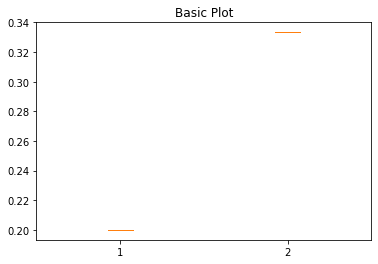

stats data for new times
DescribeResult(nobs=10, minmax=(2191, 2559), mean=2343.9, variance=13814.544444444444, skewness=0.49487962960966814, kurtosis=-0.798738241034497)
stats data for old time
DescribeResult(nobs=10, minmax=(1761, 2135), mean=1983.4, variance=16608.266666666666, skewness=-0.7048296689694321, kurtosis=-0.9392022558312045)


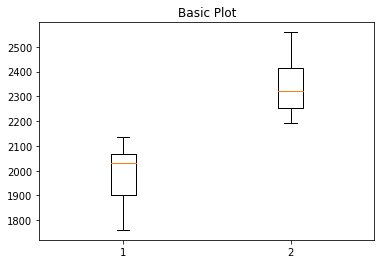

################## Class: se.kth.cid.identity.URIClassifier ##################
stats data for new coverage
DescribeResult(nobs=10, minmax=(0.5333333333333333, 0.5333333333333333), mean=0.5333333333333333, variance=0.0, skewness=0.0, kurtosis=-3.0)
stats data for old coverage
DescribeResult(nobs=10, minmax=(0.5333333333333333, 0.5333333333333333), mean=0.5333333333333333, variance=0.0, skewness=0.0, kurtosis=-3.0)


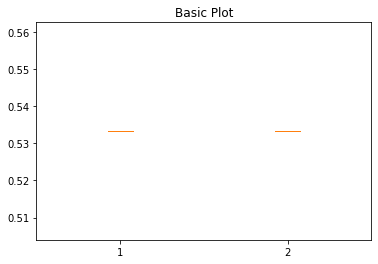

stats data for new times
DescribeResult(nobs=10, minmax=(2991, 3746), mean=3217.0, variance=64523.333333333336, skewness=1.1861914904545836, kurtosis=0.010844694538548083)
stats data for old time
DescribeResult(nobs=10, minmax=(3314, 5044), mean=3836.5, variance=367519.6111111111, skewness=0.9870801541355423, kurtosis=-0.4458076389979895)


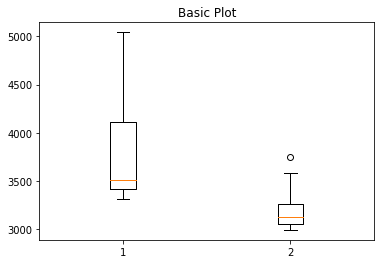

################## Class: com.prowidesoftware.swift.model.IBAN ##################
stats data for new coverage
DescribeResult(nobs=10, minmax=(0.06521739130434782, 0.06521739130434782), mean=0.06521739130434781, variance=2.139922160430262e-34, skewness=1.0, kurtosis=-2.0)
stats data for old coverage
DescribeResult(nobs=10, minmax=(0.06521739130434782, 0.06521739130434782), mean=0.06521739130434781, variance=2.139922160430262e-34, skewness=1.0, kurtosis=-2.0)


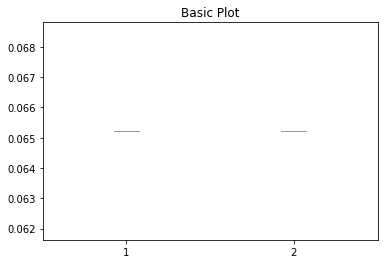

stats data for new times
DescribeResult(nobs=10, minmax=(2583, 3523), mean=2886.8, variance=82339.51111111109, skewness=1.136664963159229, kurtosis=0.34769684160150005)
stats data for old time
DescribeResult(nobs=10, minmax=(2724, 3981), mean=3028.2, variance=166460.6222222222, skewness=1.4255274852247912, kurtosis=0.913014553111045)


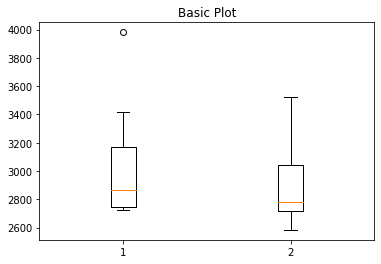

################## Class: org.joda.time.format.DateTimeFormat ##################
stats data for new coverage
DescribeResult(nobs=9, minmax=(0.3986928104575164, 0.5664488017429193), mean=0.47421931735657225, variance=0.005645976618679424, skewness=0.22360357905470096, kurtosis=-1.8875841683244574)
stats data for old coverage
DescribeResult(nobs=9, minmax=(0.38344226579520696, 0.6122004357298475), mean=0.5770999757927862, variance=0.005360526630835773, skewness=-2.4011028933945755, kurtosis=3.905515811532072)


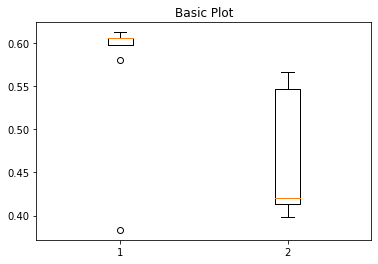

stats data for new times
DescribeResult(nobs=9, minmax=(92250, 121263), mean=101286.44444444444, variance=96466874.77777778, skewness=1.1130988924159584, kurtosis=-0.05101492816964015)
stats data for old time
DescribeResult(nobs=9, minmax=(83080, 136772), mean=118896.11111111111, variance=287821001.1111111, skewness=-0.873424121098262, kurtosis=0.2635138493025284)


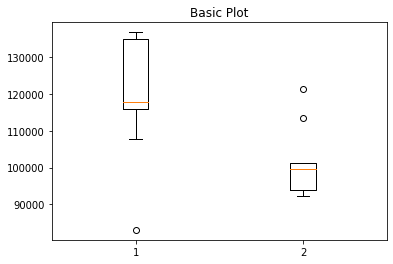

In [34]:
import time
from scipy import stats

for claz in CLASSES_COVERAGE:
    print("################## Class: {} ##################".format(claz))
    if (not (len(coverages_new[claz]) == 0 or len(coverages_old[claz]) == 0)):
        coveragess = [
            coverages_old[claz],
            coverages_new[claz]
        ]
        
        print("stats data for new coverage")
        print(stats.describe(coverages_new[claz]))
        print("stats data for old coverage")
        print(stats.describe(coverages_old[claz]))

        fig1, ax1 = plt.subplots()
        ax1.set_title('Basic Plot')
        ax1.boxplot(coveragess)
        plt.show()
        
    if (not (len(times_new[claz]) == 0 or len(times_old[claz]) == 0)):
        timess = [
            times_old[claz],
            times_new[claz]
        ]
        
        
        print("stats data for new times")
        print(stats.describe(times_new[claz]))
        print("stats data for old time")
        print(stats.describe(times_old[claz]))
        
        fig2, ax2 = plt.subplots()
        ax2.set_title('Basic Plot')
        ax2.boxplot(timess)
        plt.show()

As can be seen in the 

In [32]:
coverages_old['org.joda.time.format.DateTimeFormat']
# coverages_new['org.joda.time.format.DateTimeFormat']

[0.6056644880174292,
 0.6056644880174292,
 0.38344226579520696,
 0.6056644880174292,
 0.599128540305011,
 0.579520697167756,
 0.5969498910675382,
 0.6122004357298475,
 0.6056644880174292]

# Deprecated Stuff

In [5]:
for iteration_index in range(1, 11):
    iteration_new_data = pd.read_csv(
        '../Benchmarks/clases_del_paper/repos/jars/report_new_algoritmo/statistics-iteration-{}.csv'
            .format(iteration_index)
    )
    iteration_old_data = pd.read_csv(
        '../Benchmarks/clases_del_paper/repos/jars/report_old_algoritmo/statistics-iteration-{}.csv'
            .format(iteration_index)
    )
    
    for index, claz in enumerate(iteration_old_data.loc[:, "TARGET_CLASS"].to_numpy()):
        for col in COLUMNS:
            
            # If for any reason the experiment data is not there, we just skip it
            # TODO: why this may happen??? 
            if (claz in iteration_old_data.loc[:, "TARGET_CLASS"].to_numpy() 
                and col  in iteration_old_data.columns):
                data[claz][col]["old_algorithm"].append(
                    iteration_old_data.loc[index, col]
                )
    
    for index, claz in enumerate(iteration_new_data.loc[:, "TARGET_CLASS"].to_numpy()):
        for col in COLUMNS:
            
            # If for any reason the experiment data is not there, we just skip it
            # TODO: why this may happen???             
            if (claz in iteration_new_data.loc[:, "TARGET_CLASS"].to_numpy() 
                and col  in iteration_new_data.columns):

                data[claz][col]["new_algorithm"].append(
                    iteration_new_data.loc[index, col]
                )
                